<a href="https://colab.research.google.com/github/Chandu106/Adult_income/blob/main/adult_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
project = pd.read_csv("https://raw.githubusercontent.com/Chandu106/Adult_income/main/adult.csv")

In [8]:
project.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [17]:
X = project.drop("income",axis=1)
y = project["income"]

In [18]:
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [19]:
y.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: income, dtype: object

In [22]:
X1 = pd.get_dummies(X)
X1.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
y1 = pd.get_dummies(y)
y1.head()

,<=50K,>50K
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0


In [27]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, 
                                                    y1, 
                                                    test_size=0.2, 
                                                    random_state=42) 
     

In [28]:
len(X_train), len(X_test), len(y_train), len(y_test)

(39073, 9769, 39073, 9769)

In [47]:
# set random seed 
tf.random.set_seed(42)

# creating the model
model_01 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(2, activation = tf.keras.activations.softmax)
])

# compile the model 
model_01.compile(loss = tf.keras.losses.binary_crossentropy,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# fit the model 
history = model_01.fit(X_train , y_train , epochs = 10)

Epoch 1/10
1222/1222 [==============================] - 6s 4ms/step - loss: 46.1443 - accuracy: 0.7308
Epoch 2/10
1222/1222 [==============================] - 4s 3ms/step - loss: 0.5569 - accuracy: 0.7610
Epoch 3/10
1222/1222 [==============================] - 4s 3ms/step - loss: 0.5498 - accuracy: 0.7610
Epoch 4/10
1222/1222 [==============================] - 7s 6ms/step - loss: 0.5495 - accuracy: 0.7610
Epoch 5/10
1222/1222 [==============================] - 6s 5ms/step - loss: 0.5495 - accuracy: 0.7610
Epoch 6/10
1222/1222 [==============================] - 5s 4ms/step - loss: 0.5495 - accuracy: 0.7610
Epoch 7/10
1222/1222 [==============================] - 4s 3ms/step - loss: 0.5495 - accuracy: 0.7610
Epoch 8/10
1222/1222 [==============================] - 5s 4ms/step - loss: 0.5495 - accuracy: 0.7610
Epoch 9/10
1222/1222 [==============================] - 4s 3ms/step - loss: 0.5495 - accuracy: 0.7610
Epoch 10/10
1222/1222 [==============================] - 4s 3ms/step - loss: 0.54

In [48]:
model_01.evaluate(X_test, y_test)

306/306 [==============================] - 1s 2ms/step - loss: 0.5417 - accuracy: 0.7677


[0.541661262512207, 0.7677346467971802]

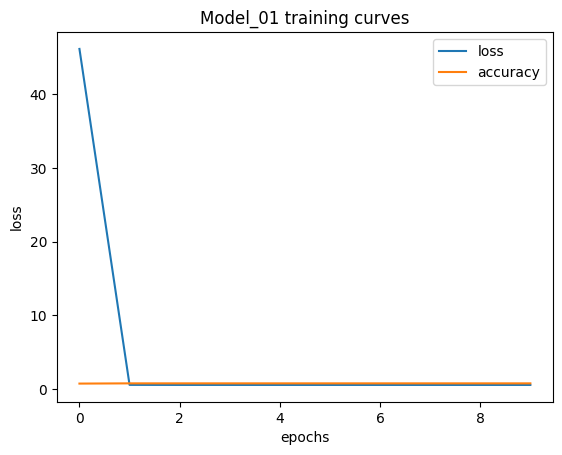

In [49]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Model_01 training curves");

In [51]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_02 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(2, activation="softmax") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_02.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_02.fit(X_train, y_train, epochs=25)

Epoch 1/25
1222/1222 [==============================] - 6s 4ms/step - loss: 154.4858 - accuracy: 0.7290
Epoch 2/25
1222/1222 [==============================] - 4s 3ms/step - loss: 103.8761 - accuracy: 0.7337
Epoch 3/25
1222/1222 [==============================] - 4s 3ms/step - loss: 72.3051 - accuracy: 0.7281
Epoch 4/25
1222/1222 [==============================] - 4s 4ms/step - loss: 56.2767 - accuracy: 0.7333
Epoch 5/25
1222/1222 [==============================] - 4s 3ms/step - loss: 48.7078 - accuracy: 0.7362
Epoch 6/25
1222/1222 [==============================] - 5s 4ms/step - loss: 52.9781 - accuracy: 0.7384
Epoch 7/25
1222/1222 [==============================] - 5s 4ms/step - loss: 46.2373 - accuracy: 0.7311
Epoch 8/25
1222/1222 [==============================] - 5s 4ms/step - loss: 39.5762 - accuracy: 0.7300
Epoch 9/25
1222/1222 [==============================] - 8s 6ms/step - loss: 36.8376 - accuracy: 0.7419
Epoch 10/25
1222/1222 [==============================] - 6s 5ms/step - 

In [52]:
model_02.evaluate(X_test, y_test)

306/306 [==============================] - 1s 2ms/step - loss: 0.5433 - accuracy: 0.7665


[0.5432884693145752, 0.7665063142776489]

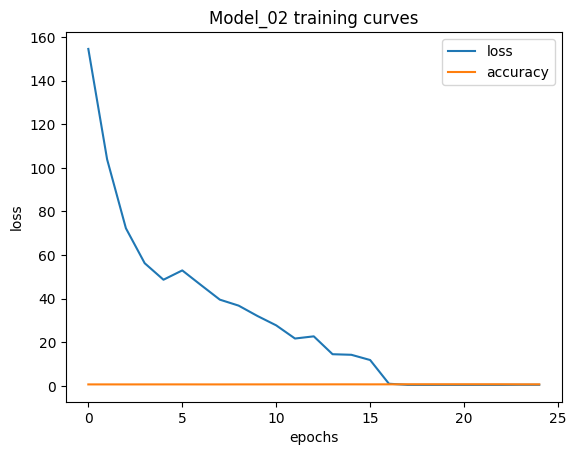

In [53]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Model_02 training curves");